# PART- 3 `( Handling With Outliers )`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [2]:
df = pd.read_csv('autoscout_cleaned_filled.csv')
dfcleanfilled = df.copy()

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     2364 non-null   object 
 1   make                           2364 non-null   object 
 2   model                          2364 non-null   object 
 3   location                       2364 non-null   object 
 4   price                          2364 non-null   float64
 5   body_type                      2364 non-null   object 
 6   type                           2364 non-null   object 
 7   doors                          2364 non-null   float64
 8   warranty                       2364 non-null   object 
 9   mileage                        2364 non-null   float64
 10  first_registration             2364 non-null   object 
 11  gearbox                        2364 non-null   object 
 12  fuel_type                      2364 non-null   o

In [4]:
df.describe(exclude= "object").T

,count,mean,std,min,25%,50%,75%,max
price,2364.000,33624.630,27038.123,4240.000,18390.000,25849.500,37482.500,267810.000
doors,2364.000,4.560,0.952,2.000,5.000,5.000,5.000,5.000
mileage,2364.000,35461.630,38182.404,0.000,8673.750,25902.000,53927.000,1000001.000
seats,2364.000,4.853,0.675,0.000,5.000,5.000,5.000,9.000
engine_size,2364.000,1767.534,768.549,0.000,1199.000,1598.000,1984.000,5513.000
gears,2364.000,6.466,1.828,1.000,6.000,6.000,8.000,10.000
co_emissions,2364.000,131.600,54.623,0.000,107.000,126.000,153.250,910.000
empty_weight,2364.000,1536.894,337.039,865.000,1277.750,1500.000,1759.000,2690.000
production_date,2364.000,2019.266,2.525,1970.000,2018.000,2019.000,2021.000,2022.000
previous_owner,2204.000,1.260,0.515,1.000,1.000,1.000,1.000,4.000


In [5]:
# Calculating of limits
def limits(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    print("Lower Limit:",lower_lim) 
    print("Upper limit:", upper_lim)

In [6]:
# Counting of Outliers
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return ((df[column]<lower_lim) | (df[column]>upper_lim)).sum()

In [7]:
# Dropping of Outliers
def dropping_of_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return df[column].loc[~((df[column]<lower_lim) | (df[column]>upper_lim))]

In [8]:
#Explore different quantiles at the upper end
def winsorize_percentage_selection(df,column):
    print('90% quantile:   ', df[column].quantile(0.90))      
    print('92.5% quantile: ', df[column].quantile(0.925))      
    print('95% quantile:   ', df[column].quantile(0.95))       
    print('97.5% quantile: ', df[column].quantile(0.975))      
    print('99% quantile:   ', df[column].quantile(0.99))       
    print('99.9% quantile: ', df[column].quantile(0.999))

PRICE

In [9]:
df.price.describe()

count     2364.000
mean     33624.630
std      27038.123
min       4240.000
25%      18390.000
50%      25849.500
75%      37482.500
max     267810.000
Name: price, dtype: float64

In [10]:
df.price.sort_values(ascending=True).head(10)

1357   4240.000
1022   4290.000
870    4479.000
1940   4890.000
1334   4990.000
1679   4999.000
1187   5400.000
1033   5799.000
367    5850.000
1988   6980.000
Name: price, dtype: float64

In [11]:
limits(df,"price")

Lower Limit: -10248.75
Upper limit: 66121.25


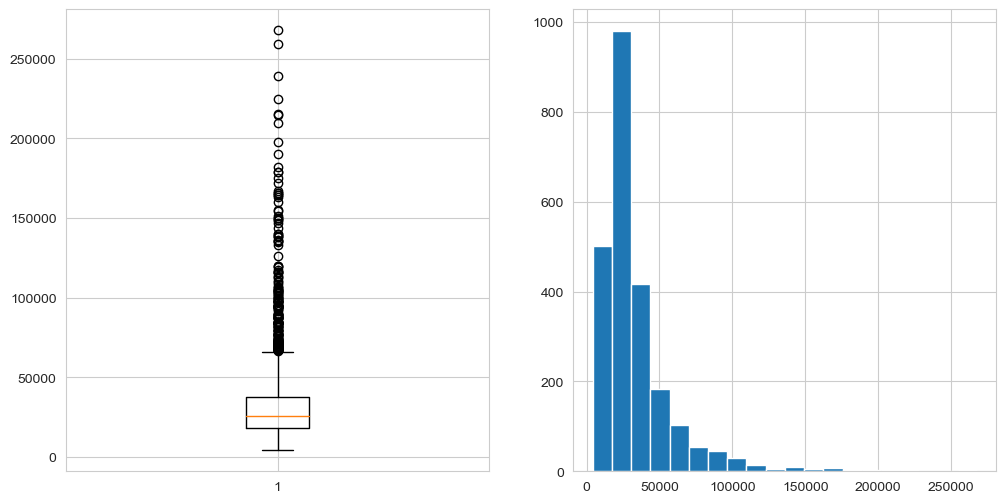

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.price)

plt.subplot(122)
plt.hist(df.price,bins=20);

In [13]:
outliers(df,"price") 

214

In [14]:
winsorize_percentage_selection(df,"price")

90% quantile:    63450.0
92.5% quantile:  70899.775
95% quantile:    84737.99999999997
97.5% quantile:  104898.5
99% quantile:    150343.62999999986
99.9% quantile:  233876.25500000242


In [15]:
# %97,5 quantile is chosen
df.price= winsorize(df["price"],(0, 0.025),inplace=True)

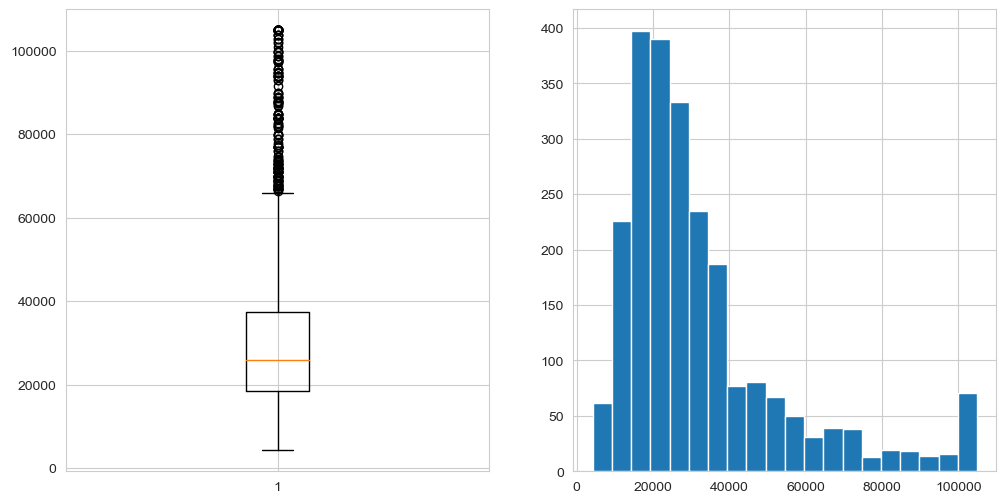

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.price)

plt.subplot(122)
plt.hist(df.price,bins=20);

In [17]:
df.price.describe()

count     2364.000
mean     32463.201
std      21744.426
min       4240.000
25%      18390.000
50%      25849.500
75%      37482.500
max     104900.000
Name: price, dtype: float64

DOORS

In [18]:
df.doors.describe()

count   2364.000
mean       4.560
std        0.952
min        2.000
25%        5.000
50%        5.000
75%        5.000
max        5.000
Name: doors, dtype: float64

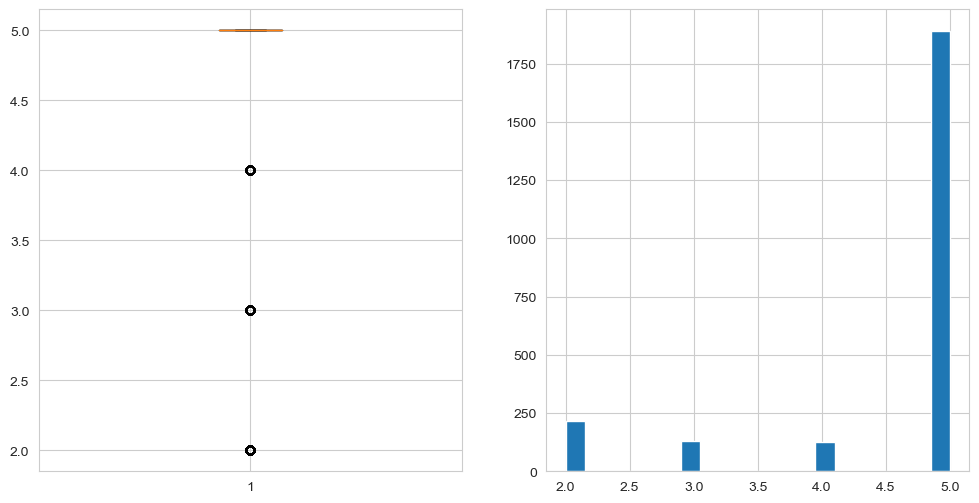

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.doors)

plt.subplot(122)
plt.hist(df.doors,bins=20);

In [20]:
limits(df,"doors")

Lower Limit: 5.0
Upper limit: 5.0


In [21]:
outliers(df,"doors")

475

In [22]:
df.make_model.unique()

array(['Mercedes-Benz E 400 ', 'Mercedes-Benz Amg Gt ',
       'Mercedes-Benz C 400 ', 'Mercedes-Benz Sl 43',
       'Mercedes-Benz Sl 500 ', 'Mercedes-Benz C 43 Amg ',
       'Mercedes-Benz Slk ', 'Mercedes-Benz C 63 Amg ',
       'Mercedes-Benz Andere', 'Mercedes-Benz E 300 ',
       'Mercedes-Benz S 560 ', 'Mercedes-Benz E 200 ',
       'Mercedes-Benz C 200 ', 'Mercedes-Benz Slc 200 ',
       'Mercedes-Benz E 450 ', 'Mercedes-Benz E 250 ',
       'Mercedes-Benz C 180 ', 'Mercedes-Benz E 350 ',
       'Mercedes-Benz Sl 63 Amg ', 'Mercedes-Benz C 300 ',
       'Mercedes-Benz E 220 ', 'Mercedes-Benz C 180',
       'Mercedes-Benz C 200', 'Mercedes-Benz Sl 600 ',
       'Mercedes-Benz Cls 400 ', 'Mercedes-Benz Amg Gt',
       'Mercedes-Benz E 53 Amg ', 'Mercedes-Benz Cls 450 ',
       'Mercedes-Benz S 63 Amg ', 'Mercedes-Benz Glc 43 Amg ',
       'Mercedes-Benz S 500 ', 'Mercedes-Benz C 250 ',
       'Mercedes-Benz Glc 63 Amg ', 'Mercedes-Benz Cla 35 Amg ',
       'Mercedes-Benz Cla 45 A

In [23]:
(df.doors >5).sum()

0

In [24]:
(df.doors < 2.5).sum()

216

In [25]:
(df.doors == 1).sum()

0

In [26]:
(df.doors == 0).sum()

0

In [27]:
df.doors.loc[(df.doors == 1)] = 2

In [28]:
df= df.loc[(df.doors >= 2.5) & (df.doors <=5)]

In [29]:
df.doors.describe()

count   2148.000
mean       4.818
std        0.521
min        3.000
25%        5.000
50%        5.000
75%        5.000
max        5.000
Name: doors, dtype: float64

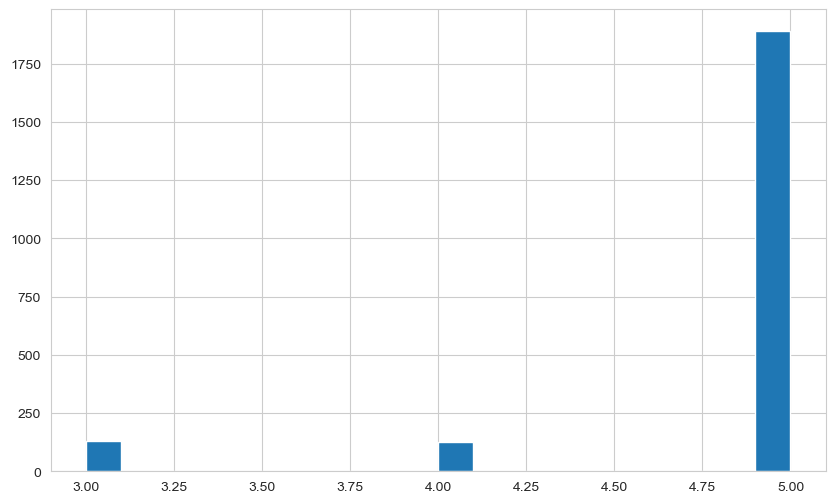

In [30]:
plt.hist(df.doors,bins=20);

MILEAGE

In [31]:
df.mileage.describe()

count      2148.000
mean      35874.913
std       38886.457
min           0.000
25%        9075.250
50%       26200.500
75%       54605.000
max     1000001.000
Name: mileage, dtype: float64

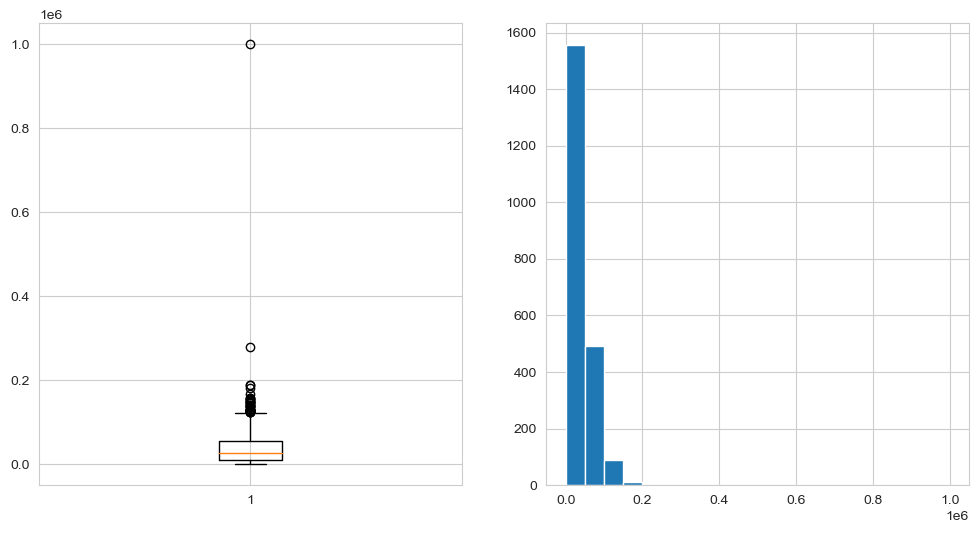

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.mileage)

plt.subplot(122)
plt.hist(df.mileage,bins=20);

In [33]:
limits(df,"mileage")

Lower Limit: -59219.375
Upper limit: 122899.625


In [34]:
outliers(df,"mileage")

40

In [35]:
winsorize_percentage_selection(df,"mileage")

90% quantile:    83159.29999999999
92.5% quantile:  89000.0
95% quantile:    98271.59999999998
97.5% quantile:  116927.09999999998
99% quantile:    137284.00000000055
99.9% quantile:  188369.0


SEATS

In [36]:
df.seats.describe()

count   2148.000
mean       4.961
std        0.575
min        0.000
25%        5.000
50%        5.000
75%        5.000
max        9.000
Name: seats, dtype: float64

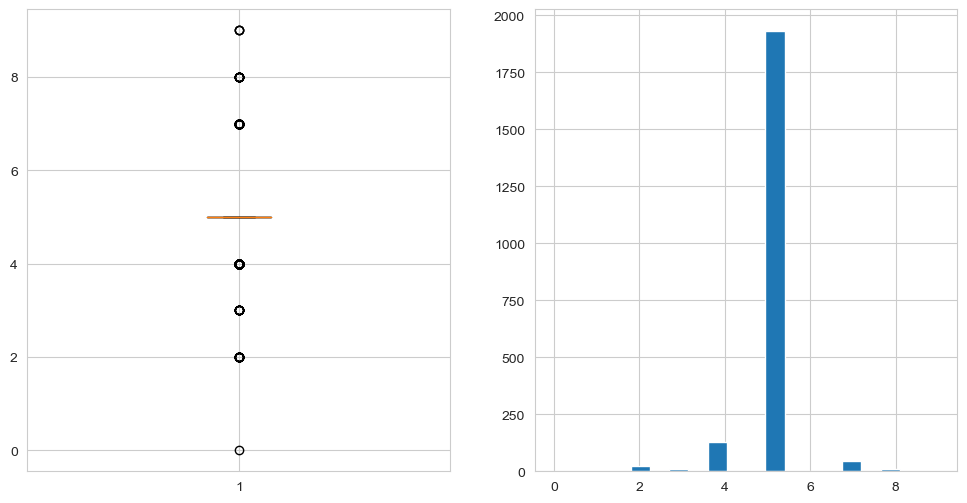

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.seats)

plt.subplot(122)
plt.hist(df.seats,bins=20);

In [38]:
limits(df,"seats")

Lower Limit: 5.0
Upper limit: 5.0


In [39]:
outliers(df,"seats")


218

ENGINE_SIZE

In [40]:
df.engine_size.describe()

count   2148.000
mean    1666.386
std      601.189
min        0.000
25%     1199.000
50%     1595.000
75%     1969.000
max     5461.000
Name: engine_size, dtype: float64

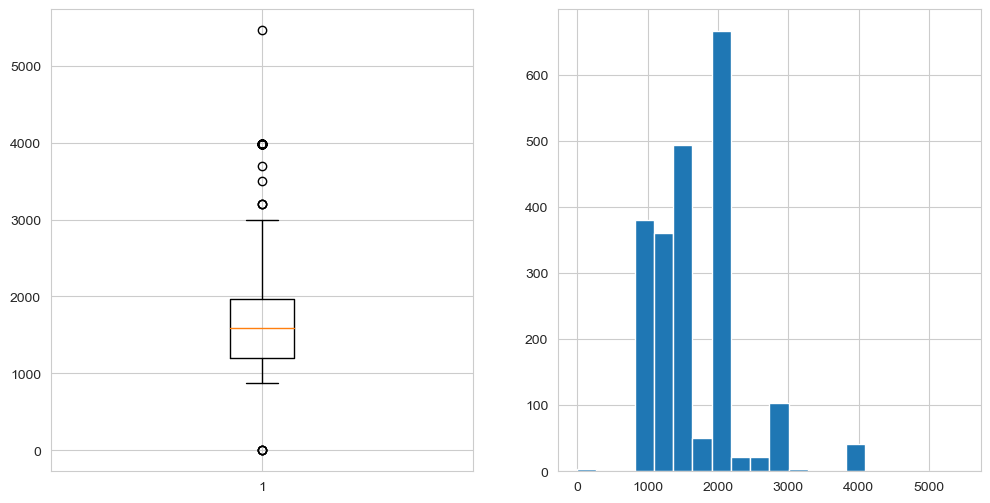

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.engine_size)

plt.subplot(122)
plt.hist(df.engine_size,bins=20);

In [42]:
limits(df,"engine_size")

Lower Limit: 44.0
Upper limit: 3124.0


In [43]:
outliers(df,"engine_size")

52

In [44]:
df.make_model.unique()

array(['Mercedes-Benz Amg Gt ', 'Mercedes-Benz Cls 400 ',
       'Mercedes-Benz Amg Gt', 'Mercedes-Benz Cls 450 ',
       'Mercedes-Benz S 63 Amg ', 'Mercedes-Benz Glc 43 Amg ',
       'Mercedes-Benz Glc 63 Amg ', 'Mercedes-Benz Cla 35 Amg ',
       'Mercedes-Benz Cla 45 Amg ', 'Mercedes-Benz Cla 200 ',
       'Mercedes-Benz Cls 53 Amg ', 'Mercedes-Benz Gle 400 ',
       'Mercedes-Benz Cla 180 ', 'Mercedes-Benz Glc 400 ',
       'Mercedes-Benz Cls 300 ', 'Mercedes-Benz Gle 300 ',
       'Mercedes-Benz Glc 350 ', 'Mercedes-Benz Gle 43 Amg ',
       'Mercedes-Benz Gle 350 ', 'Mercedes-Benz Gle 580 ',
       'Mercedes-Benz Gle 53 Amg ', 'Mercedes-Benz Gla 220 ',
       'Mercedes-Benz Gle 450 ', 'Mercedes-Benz G 500 ',
       'Mercedes-Benz G 400 ', 'Mercedes-Benz Glk 250 ',
       'Mercedes-Benz Glk 350 ', 'Mercedes-Benz Gls 400 ',
       'Mercedes-Benz G 63 Amg ', 'Mercedes-Benz Glc 300 ',
       'Mercedes-Benz Glb 35 Amg ', 'Mercedes-Benz Glk 220 ',
       'Mercedes-Benz G 350 ', 'Merce

<Axes: xlabel='engine_size', ylabel='make_model'>

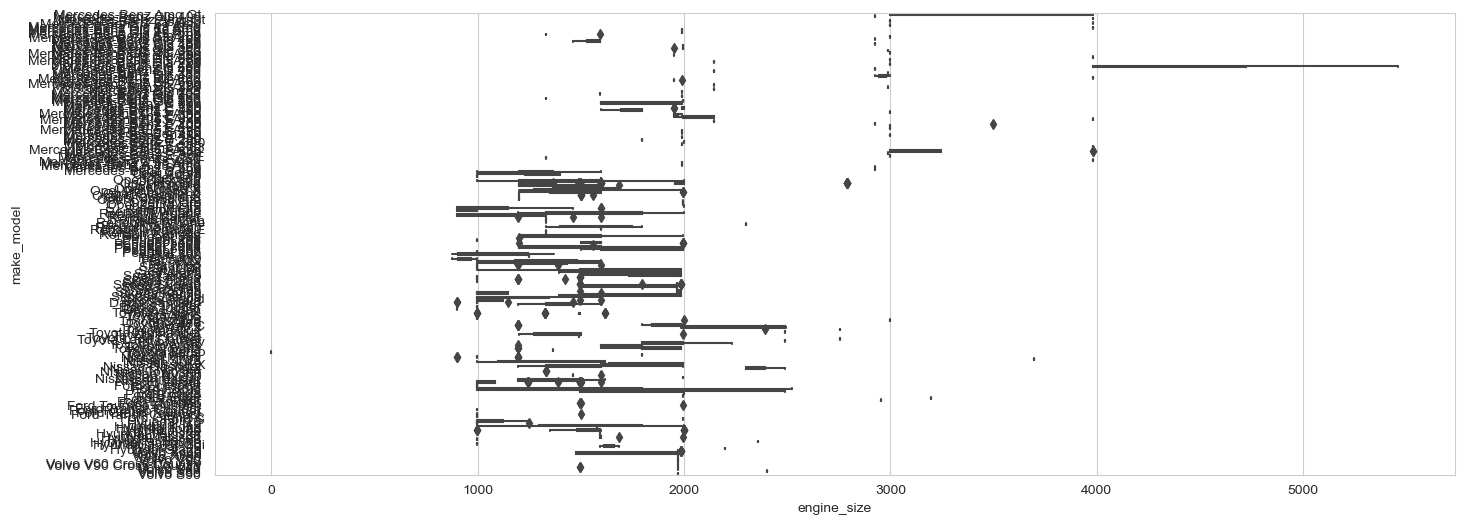

In [45]:
plt.figure(figsize=(16,6))
sns.boxplot(x="engine_size", y="make_model", data=df)

In [46]:
(df.engine_size > 2500).sum()

153

In [47]:
(df.engine_size > 1000).sum()

1771

In [48]:
df= df.loc[(df.engine_size >= 1000) & (df.engine_size <= 2500)]

In [49]:
df.engine_size.describe()

count   1618.000
mean    1675.871
std      322.957
min     1084.000
25%     1398.000
50%     1598.000
75%     1969.000
max     2494.000
Name: engine_size, dtype: float64

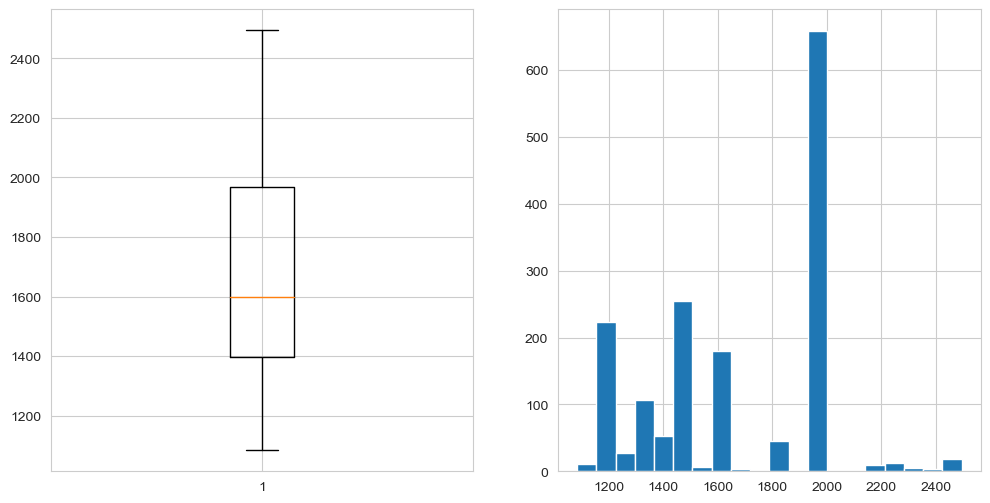

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.engine_size)

plt.subplot(122)
plt.hist(df.engine_size,bins=20);

GEARS

In [51]:
df.gears.describe()

count   1618.000
mean       6.345
std        1.867
min        1.000
25%        6.000
50%        6.000
75%        8.000
max        9.000
Name: gears, dtype: float64

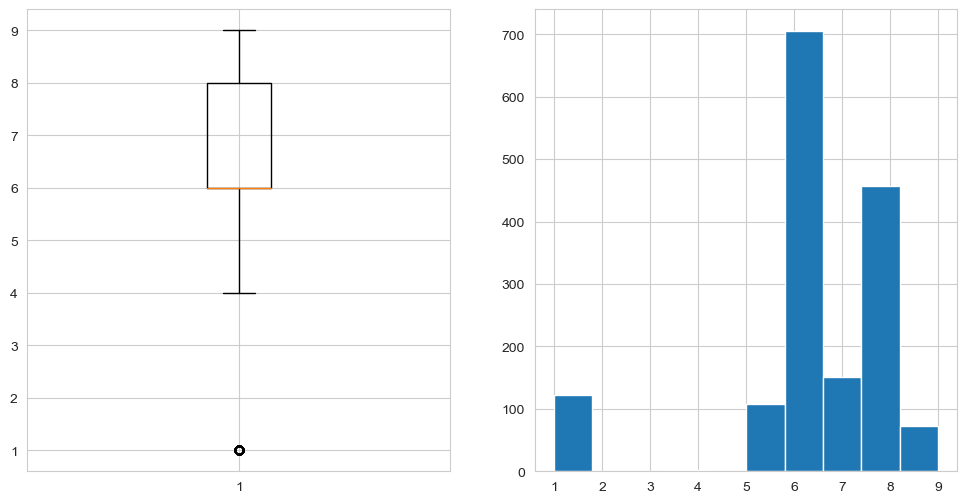

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.gears)

plt.subplot(122)
plt.hist(df.gears,bins=10);

In [53]:
limits(df,"gears")

Lower Limit: 3.0
Upper limit: 11.0


In [54]:
outliers(df,"gears")

123

CO_EMISSIONS

In [55]:
df.co_emissions.describe()

count   1618.000
mean     121.342
std       46.592
min        0.000
25%      106.000
50%      125.000
75%      144.000
max      910.000
Name: co_emissions, dtype: float64

In [56]:
limits(df, "co_emissions")

Lower Limit: 49.0
Upper limit: 201.0


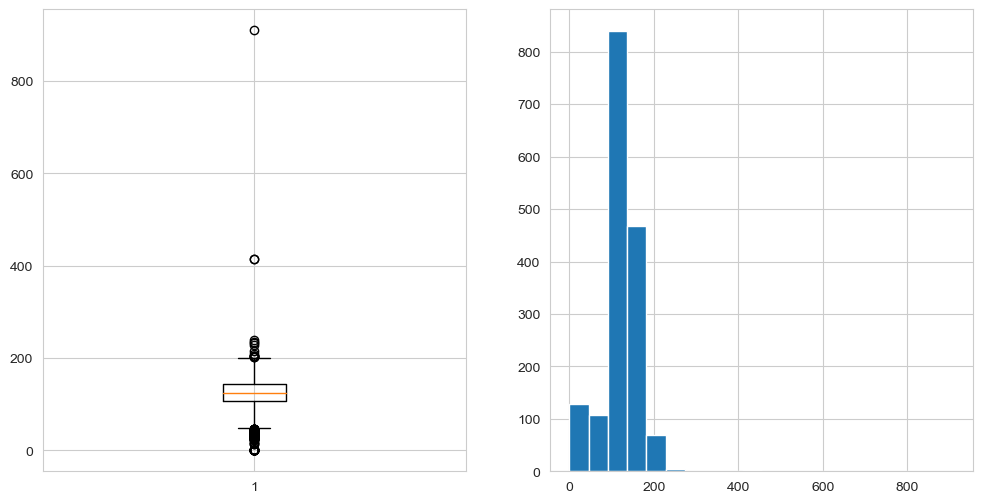

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.co_emissions)

plt.subplot(122)
plt.hist(df.co_emissions,bins=20);

In [58]:
outliers(df, "co_emissions")

152

In [59]:
winsorize_percentage_selection(df, "co_emissions")

90% quantile:    170.0
92.5% quantile:  175.0
95% quantile:    181.0
97.5% quantile:  191.0
99% quantile:    199.82999999999993
99.9% quantile:  414.0


In [60]:
#95% quantile is selected
df.CO2_Emission= winsorize(df["co_emissions"],(0, 0.05),inplace=True)

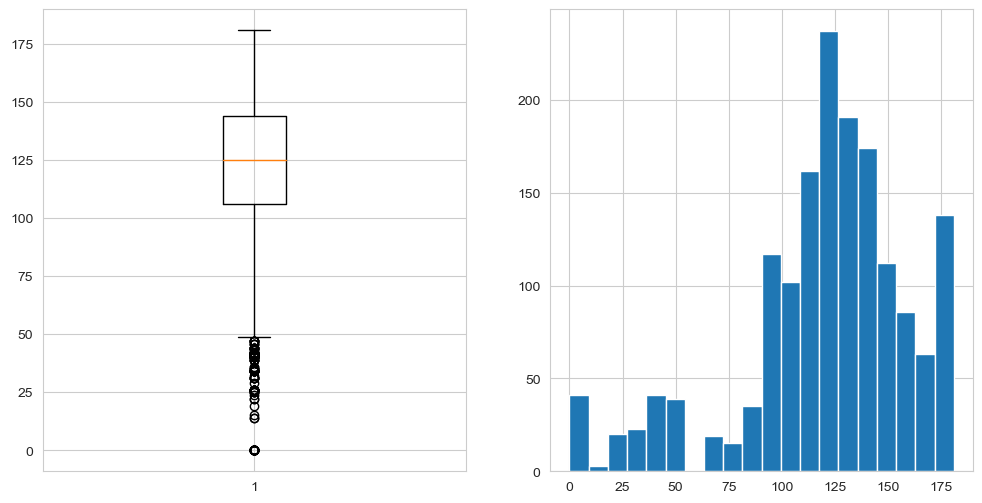

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.co_emissions)

plt.subplot(122)
plt.hist(df.co_emissions,bins=20);

PRODUCTION_DATE

In [62]:
df.production_date.describe()

count   1618.000
mean    2019.166
std        2.230
min     2005.000
25%     2018.000
50%     2019.000
75%     2021.000
max     2022.000
Name: production_date, dtype: float64

In [63]:
limits(df, "production_date")

Lower Limit: 2013.5
Upper limit: 2025.5


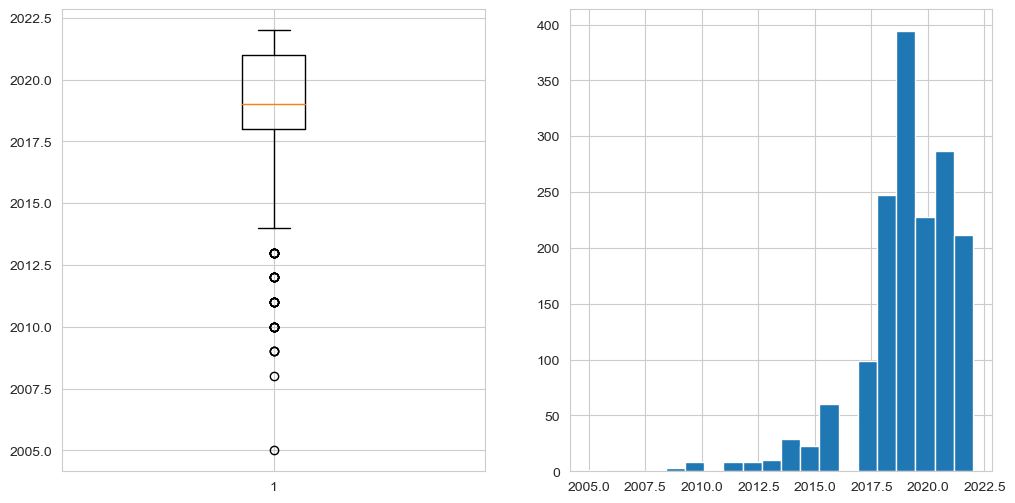

In [64]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.production_date)

plt.subplot(122)
plt.hist(df.production_date,bins=20);

In [65]:
outliers(df, "production_date")

39

In [66]:
winsorize_percentage_selection(df, "production_date")

90% quantile:    2022.0
92.5% quantile:  2022.0
95% quantile:    2022.0
97.5% quantile:  2022.0
99% quantile:    2022.0
99.9% quantile:  2022.0


In [67]:
#90% quantile is selected
df.CO2_Emission= winsorize(df["production_date"],(0, 0.1),inplace=True)

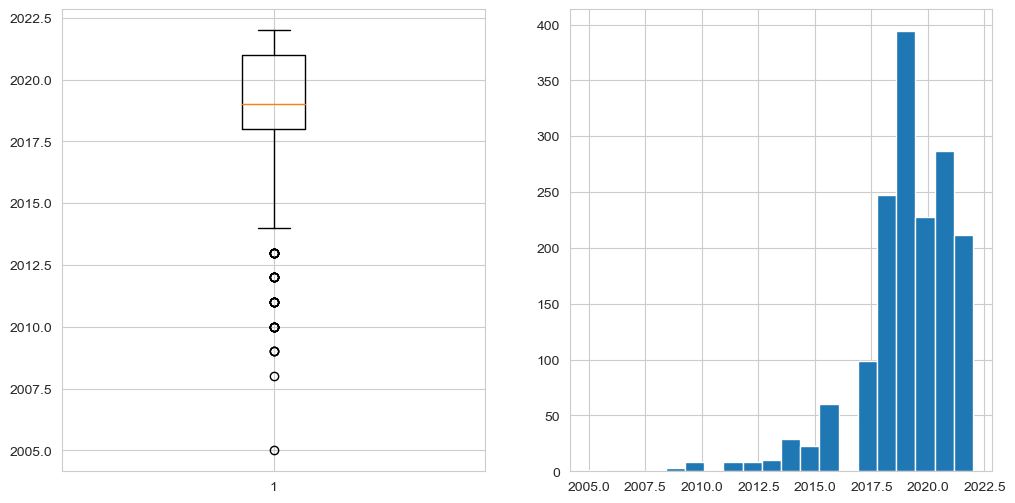

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.production_date)

plt.subplot(122)
plt.hist(df.production_date,bins=20);

COMBINED_FUEL_CONS

In [69]:
df.combined_fuel_cons.describe()

count   1618.000
mean       5.096
std        1.633
min        0.000
25%        4.300
50%        5.200
75%        6.000
max       10.000
Name: combined_fuel_cons, dtype: float64

In [70]:
limits(df, "combined_fuel_cons")

Lower Limit: 1.7499999999999996
Upper limit: 8.55


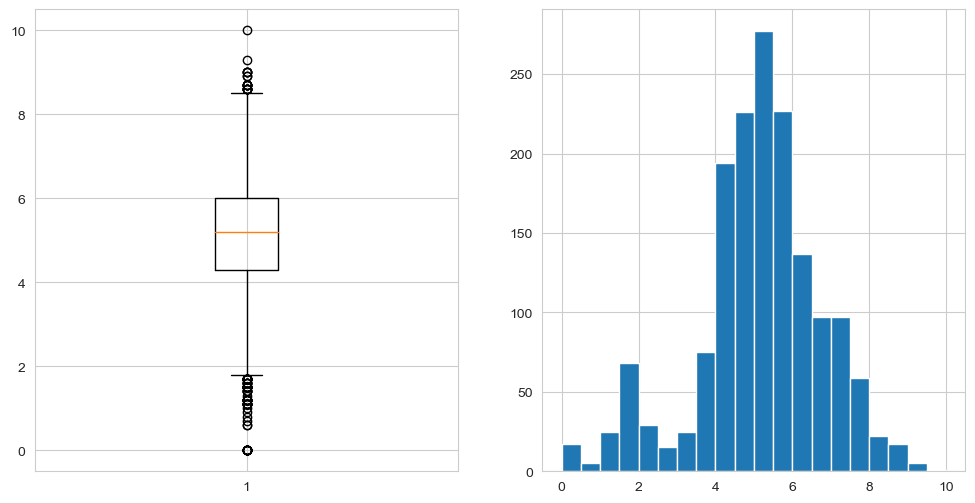

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.combined_fuel_cons)

plt.subplot(122)
plt.hist(df.combined_fuel_cons,bins=20);

In [72]:
outliers(df, "combined_fuel_cons")

114

In [73]:
winsorize_percentage_selection(df, "combined_fuel_cons")

90% quantile:    7.1299999999999955
92.5% quantile:  7.4
95% quantile:    7.7
97.5% quantile:  8.2
99% quantile:    8.6
99.9% quantile:  9.11490000000008


In [74]:
#99% quantile is selected
df.CO2_Emission= winsorize(df["combined_fuel_cons"],(0, 0.01),inplace=True)

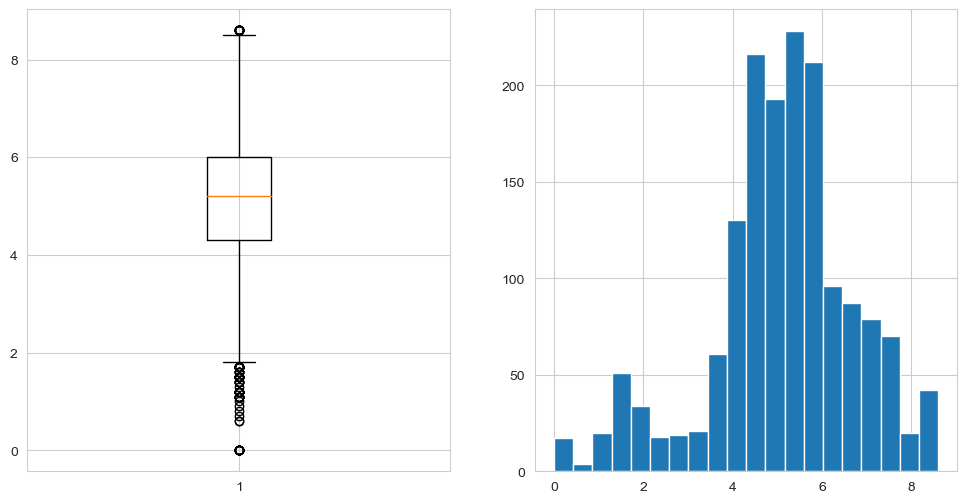

In [75]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.combined_fuel_cons)

plt.subplot(122)
plt.hist(df.combined_fuel_cons,bins=20);

In [76]:
df.head(3).T

,106,107,110
make_model,Mercedes-Benz Cla 35 Amg,Mercedes-Benz Cla 45 Amg,Mercedes-Benz Cla 200
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
model,Cla 35 Amg,Cla 45 Amg,Cla 200
location,"Am Buchrain 4, 79713 Bad Säckingen, DE","Wormser Landstraße 194, 67346 Speyer, DE","Wormser Landstraße 194, 67346 Speyer, DE"
price,52490.000,65800.000,36450.000
body_type,Coupe,Coupe,Coupe
type,Used,Used,Used
doors,4.000,5.000,4.000
warranty,Yes,0,0
mileage,25668.000,10100.000,45999.000


In [77]:
df.shape

(1618, 31)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 106 to 2363
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     1618 non-null   object 
 1   make                           1618 non-null   object 
 2   model                          1618 non-null   object 
 3   location                       1618 non-null   object 
 4   price                          1618 non-null   float64
 5   body_type                      1618 non-null   object 
 6   type                           1618 non-null   object 
 7   doors                          1618 non-null   float64
 8   warranty                       1618 non-null   object 
 9   mileage                        1618 non-null   float64
 10  first_registration             1618 non-null   object 
 11  gearbox                        1618 non-null   object 
 12  fuel_type                      1618 non-null  

In [79]:
df.isnull().sum()

make_model                         0
make                               0
model                              0
location                           0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
first_registration                 0
gearbox                            0
fuel_type                          0
seller                             0
seats                              0
engine_size                        0
gears                              0
co_emissions                       0
drivetrain                         0
extras                             0
empty_weight                       0
full_service_history               0
upholstery                        46
production_date                    0
previous_owner                   124
energy_efficiency_class            0
new                                0
c

# Final Step (Checking final situation of data via graphs)

## Export dataframe to csv file (without dummy)

In [80]:
df.to_csv('autoscout_clean_filled_trimmed_not_dummy.csv', index=False)
df1= df.to_csv("autoscout_clean_filled_trimmed_not_dummy.csv", index=False)
df1

# Dummy Operation

In [81]:
df.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
price,1618.000,29019.884,14690.037,4479.000,18951.250,25990.000,34960.000,103885.000
doors,1618.000,4.863,0.461,3.000,5.000,5.000,5.000,5.000
mileage,1618.000,39016.552,41027.484,0.000,11913.750,29999.500,57396.000,1000001.000
seats,1618.000,5.035,0.504,2.000,5.000,5.000,5.000,9.000
engine_size,1618.000,1675.871,322.957,1084.000,1398.000,1598.000,1969.000,2494.000
gears,1618.000,6.345,1.867,1.000,6.000,6.000,8.000,9.000
co_emissions,1618.000,120.026,40.027,0.000,106.000,125.000,144.000,181.000
empty_weight,1618.000,1550.914,296.007,940.000,1342.750,1505.000,1735.000,2690.000
production_date,1618.000,2019.166,2.230,2005.000,2018.000,2019.000,2021.000,2022.000
previous_owner,1494.000,1.250,0.480,1.000,1.000,1.000,1.000,4.000


In [82]:
numeric_columns = 'price, doors, mileage, seats, engine_size, gears, co_emissions, empty_weight, production_date, previous_owner, combined_fuel_cons'.split(", ")
df_numeric = df[numeric_columns]


In [83]:
df_numeric.head(3).T

,106,107,110
price,52490.000,65800.000,36450.000
doors,4.000,5.000,4.000
mileage,25668.000,10100.000,45999.000
seats,5.000,5.000,5.000
engine_size,1991.000,1991.000,1332.000
gears,7.000,8.000,7.000
co_emissions,164.000,181.000,127.000
empty_weight,1590.000,1680.000,1400.000
production_date,2019.000,2021.000,2019.000
previous_owner,1.000,1.000,2.000


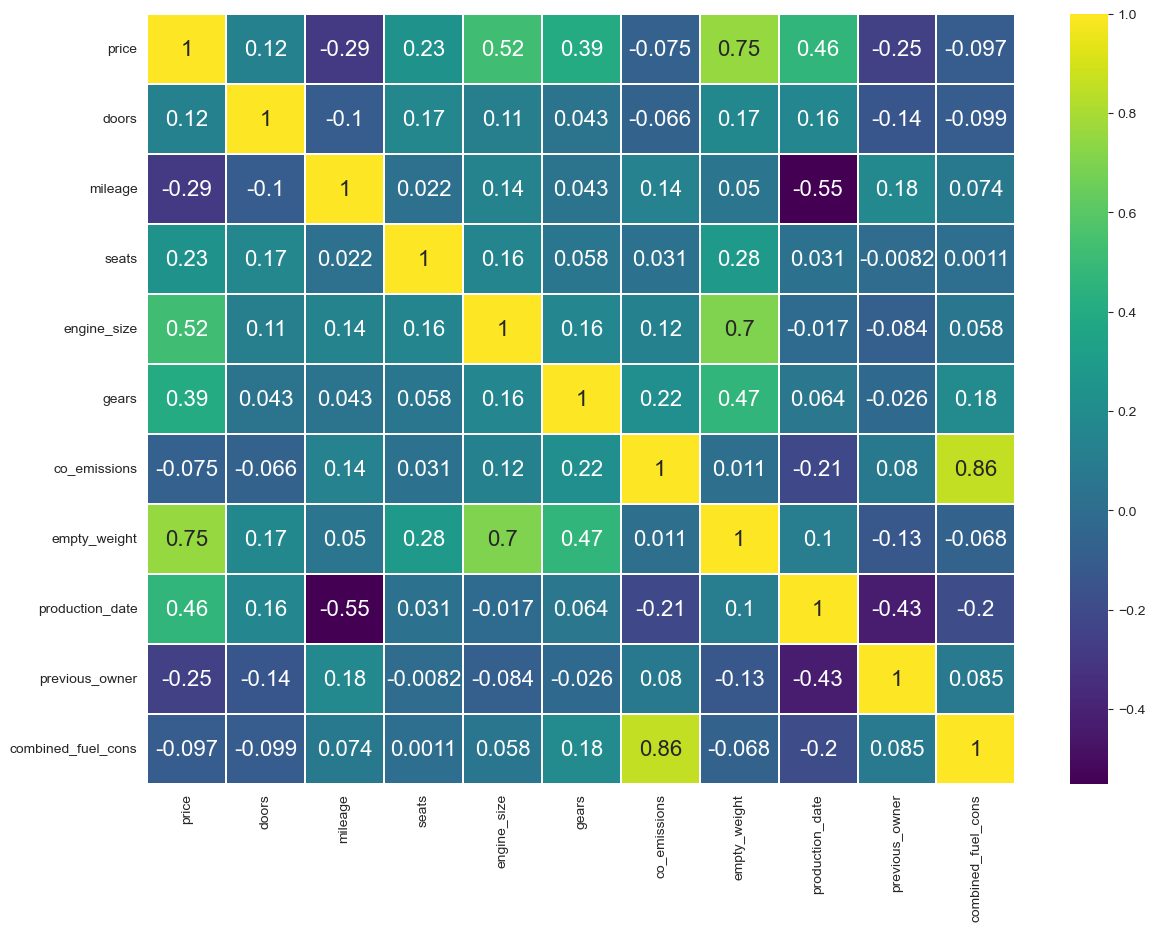

In [84]:
plt.figure(figsize = (14,10))
sns.heatmap(df_numeric.corr(), annot = True, cmap="viridis", linewidths=0.2, annot_kws = {"size": 16});

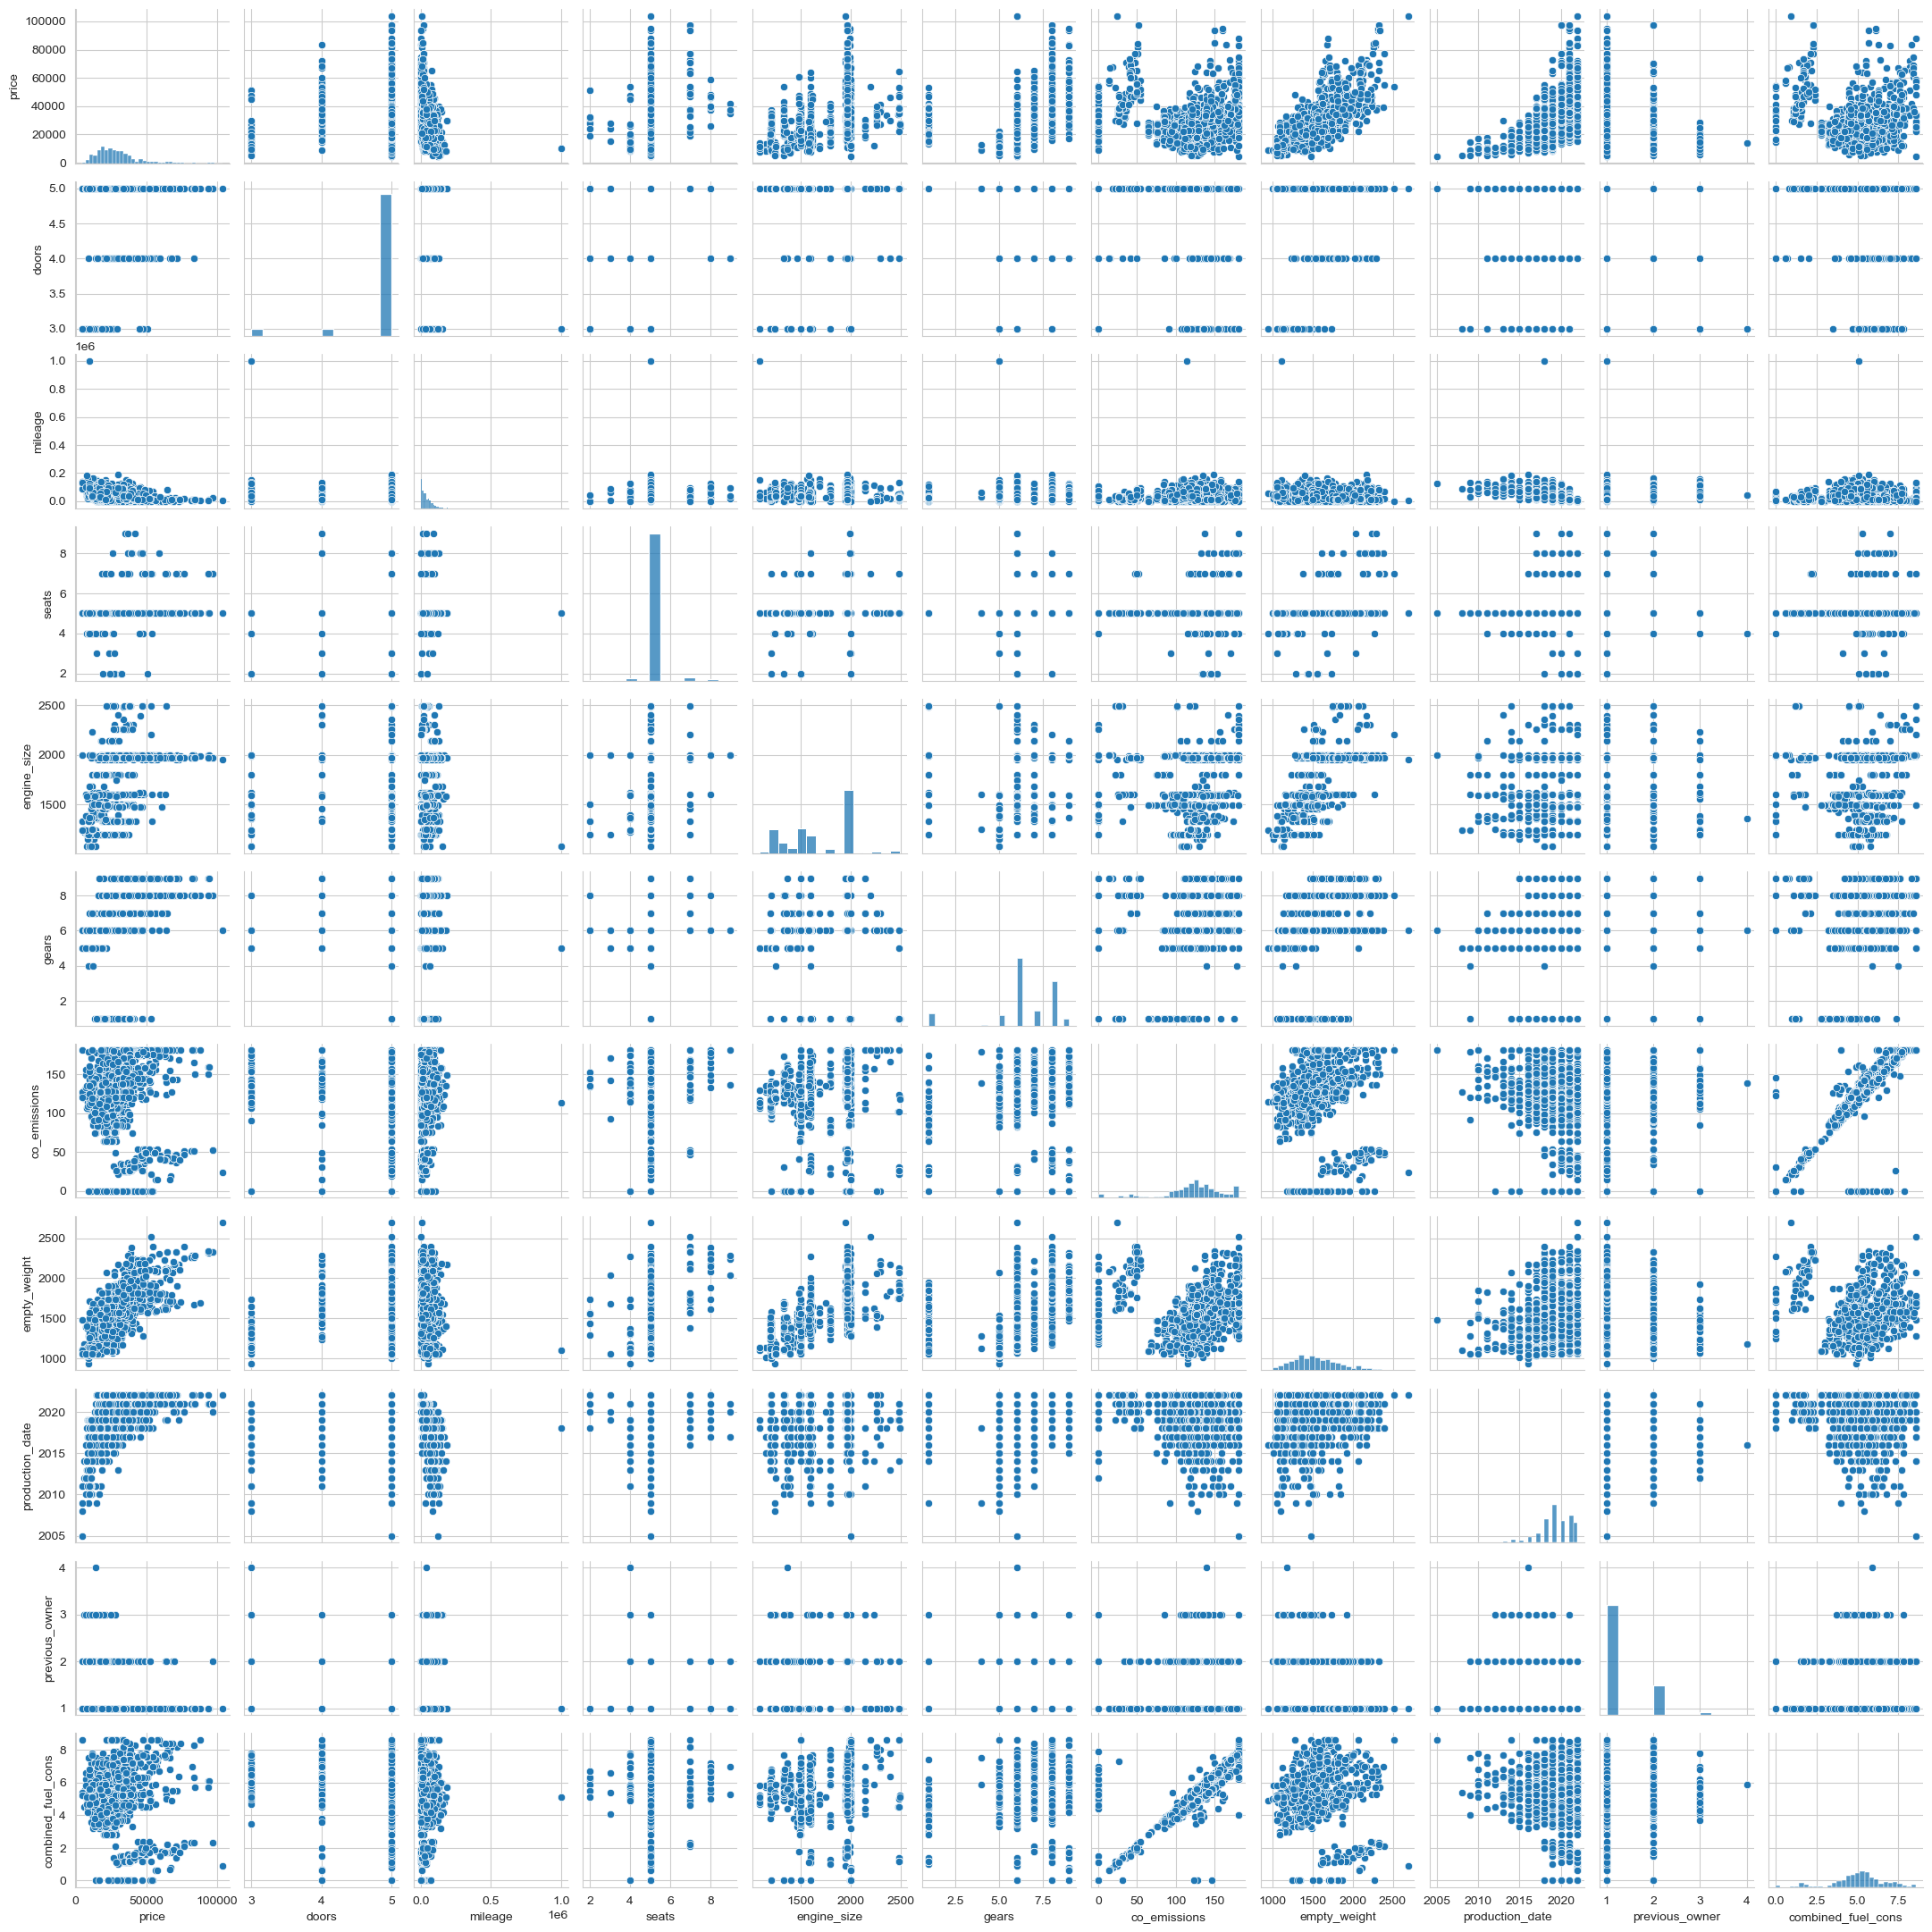

In [85]:
sns.pairplot(df_numeric, size=2);

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 106 to 2363
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     1618 non-null   object 
 1   make                           1618 non-null   object 
 2   model                          1618 non-null   object 
 3   location                       1618 non-null   object 
 4   price                          1618 non-null   float64
 5   body_type                      1618 non-null   object 
 6   type                           1618 non-null   object 
 7   doors                          1618 non-null   float64
 8   warranty                       1618 non-null   object 
 9   mileage                        1618 non-null   float64
 10  first_registration             1618 non-null   object 
 11  gearbox                        1618 non-null   object 
 12  fuel_type                      1618 non-null  

In [87]:
df.shape

(1618, 31)

In [88]:
df = df.join(df["comfort_&_convenience_Package"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["entertainment_&_media_Package"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_&_security_Package"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [89]:
df.drop(["comfort_&_convenience_Package","entertainment_&_media_Package","extras","safety_&_security_Package"], axis=1, inplace=True)

In [90]:
df.head(3).T

,106,107,110
make_model,Mercedes-Benz Cla 35 Amg,Mercedes-Benz Cla 45 Amg,Mercedes-Benz Cla 200
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
model,Cla 35 Amg,Cla 45 Amg,Cla 200
location,"Am Buchrain 4, 79713 Bad Säckingen, DE","Wormser Landstraße 194, 67346 Speyer, DE","Wormser Landstraße 194, 67346 Speyer, DE"
price,52490.000,65800.000,36450.000
body_type,Coupe,Coupe,Coupe
type,Used,Used,Used
doors,4.000,5.000,4.000
warranty,Yes,0,0
mileage,25668.000,10100.000,45999.000


In [91]:
df_dummies= pd.get_dummies(df, drop_first=True)

In [92]:
df_dummies.shape

(1618, 1016)

## Export dataframe to csv file (without dummy)

In [93]:
df_dummies.to_csv("autoscout_clean_filled_trimmed_dummy.csv", index=False)